In [1]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.models import Sequential
from keras.utils import to_categorical

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

Training data:


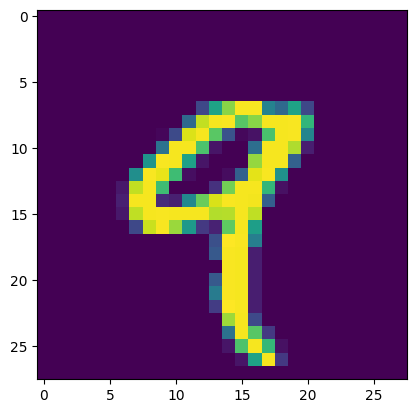

Label of this image is 9


In [3]:
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(X_train[4])
plt.show()
print("Label of this image is",y_train[4])

In [4]:
#reshaping data as needed by the model
X_train=np.reshape(X_train,(-1,28,28,1))
X_test=np.reshape(X_test,(-1,28,28,1))
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [5]:
#normalising
X_train=X_train/255
X_test=X_test/255

In [6]:
#implementing one hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
model=Sequential()

In [8]:
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [9]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
model.fit(X_train,y_train,batch_size=100,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
600/600 [==============================] - 13s 10ms/step - loss: 0.1275 - accuracy: 0.9606 - val_loss: 0.0493 - val_accuracy: 0.9849
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.0264 - val_accuracy: 0.9903
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.0247 - val_accuracy: 0.9920
Epoch 4/5
600/600 [==============================] - 3s 6ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0277 - val_accuracy: 0.9912
Epoch 5/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0242 - val_accuracy: 0.9917


In [11]:
#model train and test scores
print("Train loss and Accuracy ",model.evaluate(X_train,y_train))
print()

print("Test loss and Accuracy ",model.evaluate(X_test,y_test))


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087 - accuracy: 0.9974
Train loss and Accuracy  [0.008686361834406853, 0.9974166750907898]

313/313 [==============================] - 1s 4ms/step - loss: 0.0242 - accuracy: 0.9917
Test loss and Accuracy  [0.024246945977211, 0.9916999936103821]


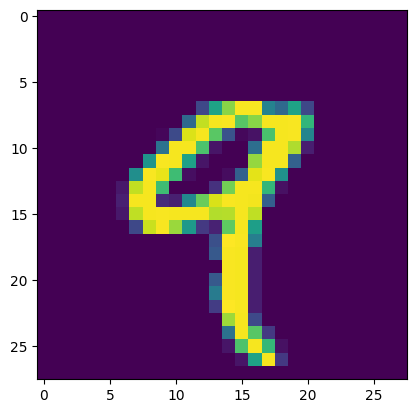

In [12]:
plt.imshow(X_train[4])

In [13]:
a=model.predict(X_train[4:5])

1/1 [==============================] - 0s 140ms/step


In [14]:
sum=0
for i in a[0]:
  sum+=i
print("Total Sum is ",sum,"\n")

sno=0
max=-1
for i in a[0]:
  if(max<i/sum): max=i/sum

  print(sno,i/sum)
  sno+=1
print("\nmax is ",max)

Total Sum is  3.1053730579760668 

0 4.8968842051562825e-06
1 0.0011713486360599426
2 6.107044385611039e-05
3 0.020674727187304204
4 0.3150500180363507
5 6.579676454793748e-05
6 1.576572691276784e-06
7 0.028413251786803567
8 0.3125348122590768
9 0.3220225014291043

max is  0.3220225014291043


#Therefore the prediction is 9.